In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [5]:
cell_df = pd.read_csv('/content/drive/My Drive/cell_samples.csv')

In [7]:

cell_df.tail()
cell_df.shape
cell_df.size
cell_df.count()
cell_df['Class'].value_counts()

2    458
4    241
Name: Class, dtype: int64

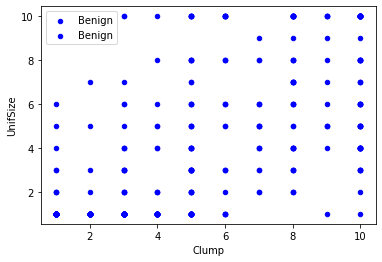

In [18]:
benign_df = cell_df[cell_df['Class']==2][0:200]
malignant_df = cell_df[cell_df['Class']==4][0:200]
axes = benign_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Benign')
malignant_df.plot(kind='scatter', x='Clump', y='UnifSize', color='blue', label='Benign', ax=axes)

In [27]:
cell_df.dtypes

cell_df = cell_df[pd.to_numeric(cell_df['BareNuc'], errors='coerce').notnull()]
cell_df['BereNuc']= cell_df['BareNuc'].astype('int')
cell_df.dtypes

ID              int64
Clump           int64
UnifSize        int64
UnifShape       int64
MargAdh         int64
SingEpiSize     int64
BareNuc        object
BlandChrom      int64
NormNucl        int64
Mit             int64
Class           int64
BereNuc         int64
dtype: object

In [30]:
cell_df.columns

feature_df = cell_df[['Clump', 'UnifSize', 'UnifShape', 'MargAdh', 'SingEpiSize', 'BareNuc', 'BlandChrom', 'NormNucl', 'Mit']]


X= np.asarray(feature_df)

y=np.asarray(cell_df['Class'])
y[0:5]

array([2, 2, 2, 2, 2])

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)
X_train.shape
X_train.shape
X_test.shape
y_test.shape

(137,)

In [35]:
from sklearn import svm
svm.SVC(kernel= 'linear', gamma = 'auto', C=2)


classifier = svm.SVC(kernel = 'linear', gamma = 'auto', C=2)
classifier.fit(X_train, y_train)

y_predict = classifier.predict(X_test)

In [38]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           2       1.00      0.94      0.97        90
           4       0.90      1.00      0.95        47

    accuracy                           0.96       137
   macro avg       0.95      0.97      0.96       137
weighted avg       0.97      0.96      0.96       137

